# TW3 Exploratory Data Analysis

#### Write full names of your team members who worked together.




#### Submission:

- Push the completed code to your Github repository.

- See more information in Canvas. 

Trivikram Pediiraju

Shivaram Muuppidi

## Part 0: 
    
The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering: 

https://github.com/CSSEGISandData/COVID-19

- Read the information on the dashboard and check the datasets details

- Datasets are located in a folder: csse_covid_19_data

We will walk through the code and see how Python Pandas functions are used to process the data. 


##### The example below is COVID19 cases in the US. 

- We download two files but they seem the same. Let's use the file for confirmed cases. 

In [2]:
# Download the data from the Web

import os
datapath = os.path.join("csse_covid_19_data", "csse_covid_19_data", "")

import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
os.makedirs(datapath, exist_ok=True)

for filename in ("time_series_covid19_confirmed_US.csv","time_series_covid19_deaths_US.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "csse_covid_19_data/csse_covid_19_data/" + filename
    urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath + filename)

In [4]:
# import necessary packages and modules

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [5]:
# read data
df = pd.read_csv(datapath + "time_series_covid19_confirmed_US.csv")
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/3/22,10/4/22,10/5/22,10/6/22,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18396,18396,18396,18422,18422,18422,18422,18422,18422,18422
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,65653,65653,65653,65742,65742,65742,65742,65742,65742,65742
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6896,6896,6896,6910,6910,6910,6910,6910,6910,6910
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7526,7526,7526,7537,7537,7537,7537,7537,7537,7537
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,16912,16912,16912,17042,17042,17042,17042,17042,17042,17042


#### We select data for two states, Washington and Texas

- If you want to select different states, modify this cell and rerun it. 

In [6]:
# Select the data for Washington and Texas
st1 = df.loc[df["Province_State"] == "Washington"]
st2 = df.loc[df["Province_State"] == "Texas"]

# drop not-used columns 
drop_cols = ['UID', 'iso2', 'iso3', 'FIPS', 'Province_State', 'Country_Region', 
             'Lat', 'Long_', 'code3', 'Combined_Key', 'Admin2']

st1 = st1.drop(columns=drop_cols)
st2 = st2.drop(columns=drop_cols)

print(st1.head())
print(st2.head())

st1.columns

      1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
3145        0        0        0        0        0        0        0        0   
3146        0        0        0        0        0        0        0        0   
3147        0        0        0        0        0        0        0        0   
3148        0        0        0        0        0        0        0        0   
3149        0        0        0        0        0        0        0        0   

      1/30/20  1/31/20  ...  10/3/22  10/4/22  10/5/22  10/6/22  10/7/22  \
3145        0        0  ...     5524     5524     5525     5525     5528   
3146        0        0  ...     5166     5166     5173     5173     5179   
3147        0        0  ...    59729    59729    59775    59775    59815   
3148        0        0  ...    23265    23265    23288    23288    23316   
3149        0        0  ...    14795    14795    14811    14811    14832   

      10/8/22  10/9/22  10/10/22  10/11/22  10/12/22  
3145   

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/3/22', '10/4/22', '10/5/22', '10/6/22', '10/7/22', '10/8/22',
       '10/9/22', '10/10/22', '10/11/22', '10/12/22'],
      dtype='object', length=995)

### sum() function

- see the examples:
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

In [7]:
# sum of column data of rows 
# columns and rows will be changed
# sum() function returns a Series
cases_st1 = st1.sum(axis=0)
cases_st2 = st2.sum(axis=0)

print(cases_st1.tail())
print(cases_st2.tail())

10/8/22     1822544
10/9/22     1822544
10/10/22    1824499
10/11/22    1824499
10/12/22    1825852
dtype: int64
10/8/22     8010466
10/9/22     8010466
10/10/22    8014961
10/11/22    8015459
10/12/22    8019459
dtype: int64


In [8]:
# createa a DataFrame of two states' data
dict_states = {'WA_cases': cases_st1, 'TX_cases': cases_st2}

data = pd.DataFrame(dict_states)

print(data.head())
print(data.tail())

         WA_cases  TX_cases
1/22/20         1         0
1/23/20         1         0
1/24/20         1         0
1/25/20         1         0
1/26/20         1         0
          WA_cases  TX_cases
10/8/22    1822544   8010466
10/9/22    1822544   8010466
10/10/22   1824499   8014961
10/11/22   1824499   8015459
10/12/22   1825852   8019459


In [9]:
# reset index (0, 1, 2, . . . ) --> adding number index
data.reset_index(inplace=True)

data.head()

,index,WA_cases,TX_cases
0,1/22/20,1,0
1,1/23/20,1,0
2,1/24/20,1,0
3,1/25/20,1,0
4,1/26/20,1,0


In [10]:
# add two new columns and set default values

data['WA_daily'] = 0
data['TX_daily'] = 0

data.head()

,index,WA_cases,TX_cases,WA_daily,TX_daily
0,1/22/20,1,0,0,0
1,1/23/20,1,0,0,0
2,1/24/20,1,0,0,0
3,1/25/20,1,0,0,0
4,1/26/20,1,0,0,0


In [11]:
# calculate daily cases and assign the values

for index, row in data.iterrows():
    if index==0:
        data.loc[index, 'WA_daily'] = data.loc[index, 'WA_cases'] 
        data.loc[index, 'TX_daily'] = data.loc[index, 'TX_cases'] 
    else:
        data.loc[index, 'WA_daily'] = data.loc[index, 'WA_cases'] - data.loc[index-1, 'WA_cases'] 
        data.loc[index, 'TX_daily'] = data.loc[index, 'TX_cases'] - data.loc[index-1, 'TX_cases'] 

    # data clearning (drop error values)
    if data.loc[index, 'WA_daily'] < 0:
        data.loc[index, 'WA_daily'] = 0
    if data.loc[index, 'TX_daily'] < 0:
        data.loc[index, 'TX_daily'] = 0

data.tail()

,index,WA_cases,TX_cases,WA_daily,TX_daily
990,10/8/22,1822544,8010466,0,0
991,10/9/22,1822544,8010466,0,0
992,10/10/22,1824499,8014961,1955,4495
993,10/11/22,1824499,8015459,0,498
994,10/12/22,1825852,8019459,1353,4000


In [12]:
# add a new column for the number of days
data['day_number'] = data.index

data.head()

,index,WA_cases,TX_cases,WA_daily,TX_daily,day_number
0,1/22/20,1,0,1,0,0
1,1/23/20,1,0,0,0,1
2,1/24/20,1,0,0,0,2
3,1/25/20,1,0,0,0,3
4,1/26/20,1,0,0,0,4


## Part 1

### Tasks

1. (Optional) Select states you are interested in from the COVID-19 data repository. The above cells contain the data for Washington and Texas. Hence if you would like to change states, you will update the above cells and rerun them. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following:

(1) Descriptive statistics: mean, median and standard deviation, mininum, maximum and quatiles.

(2) Draw boxplots.

(3) Draw histograms.

(4) Draw scatter plots and calculate correlation coefficient factor r
    
    - Given an explanatory variable x (e.g., day_number), you display a response variable y (e.g., TX_cases). 


(5) Choose one tool that has not be used here and apply it on these COVID-19 data. 

#### Task (1)

In [13]:
data.describe()


,WA_cases,TX_cases,WA_daily,TX_daily,day_number
count,9.950000e+02,9.950000e+02,995.000000,995.000000,995.00000
mean,6.501309e+05,3.377406e+06,1839.137688,8069.696482,497.00000
std,6.194424e+05,2.670163e+06,4727.049763,10779.801100,287.37606
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.00000
25%,8.770800e+04,7.697115e+05,0.000000,1646.500000,248.50000
50%,4.376770e+05,2.998379e+06,566.000000,4656.000000,497.00000
75%,1.367763e+06,6.408314e+06,1938.500000,10354.000000,745.50000
max,1.825852e+06,8.019459e+06,64166.000000,88257.000000,994.00000


#### Task (2)

<AxesSubplot:>

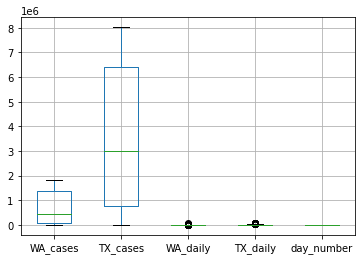

In [14]:
data.boxplot()


#### Task (3)

array([[<AxesSubplot:title={'center':'WA_cases'}>,
        <AxesSubplot:title={'center':'TX_cases'}>],
       [<AxesSubplot:title={'center':'WA_daily'}>,
        <AxesSubplot:title={'center':'TX_daily'}>],
       [<AxesSubplot:title={'center':'day_number'}>, <AxesSubplot:>]],
      dtype=object)

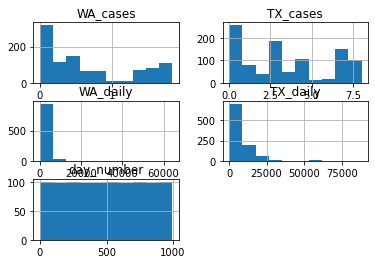

In [15]:
data.hist()


#### Task (4)

<AxesSubplot:xlabel='TX_cases', ylabel='TX_daily'>

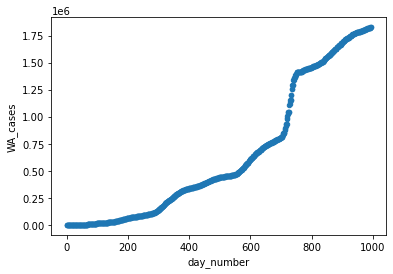

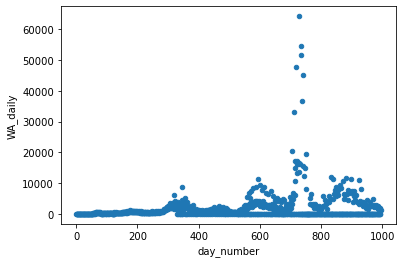

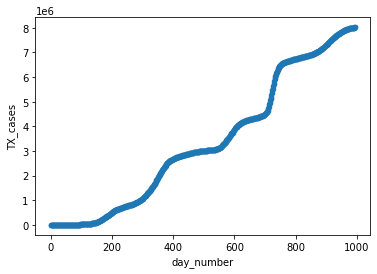

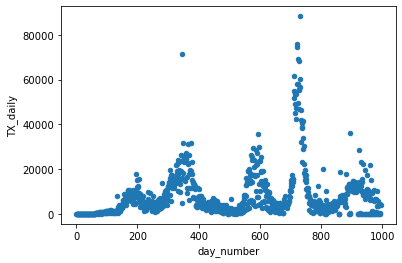

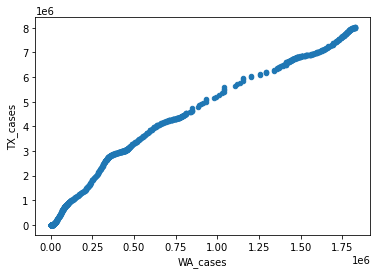

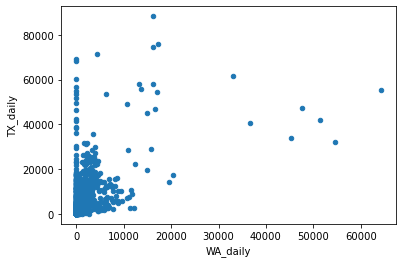

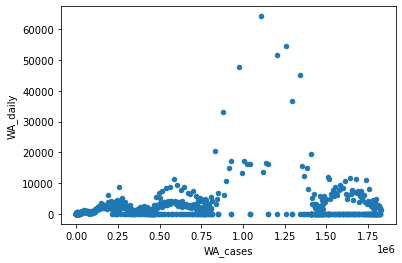

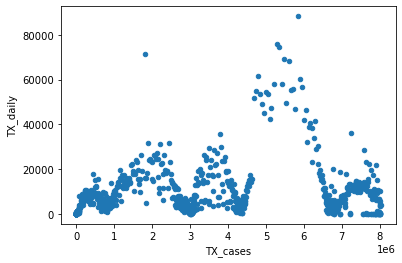

In [16]:
data.plot.scatter(x="day_number", y="WA_cases")
data.plot.scatter(x="day_number", y="WA_daily")
data.plot.scatter(x="day_number", y="TX_cases")
data.plot.scatter(x="day_number", y="TX_daily")
data.plot.scatter(x="WA_cases", y="TX_cases")
data.plot.scatter(x="WA_daily", y="TX_daily")
data.plot.scatter(x="WA_cases", y="WA_daily")
data.plot.scatter(x="TX_cases", y="TX_daily")

#### Task (5)

<AxesSubplot:xlabel='day_number'>

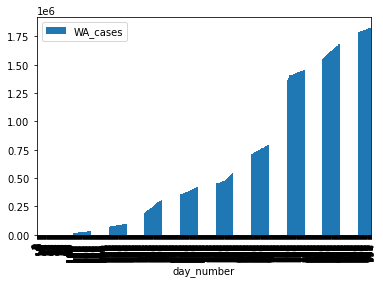

In [17]:
data.plot.bar(x="day_number",y="WA_cases")


## Part 2

Write a summary of what you find from the data analysis. 

As time passes, Texas's number of cancer cases surpasses that of Washington's.
But the most important finding here is that instances increase exponentially over time in both states.

This is the summary what we found from the data analysis

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html